In [29]:
import pandas as pd

csv_file_path = r"\archive\loan_data_set.csv"

loan_df = pd.read_csv(csv_file_path)


print(loan_df.head())    
print(loan_df.shape)      
print(loan_df.columns)      
print(loan_df.info())       
print(loan_df.describe())  
print(loan_df.isnull().sum()) 


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

Missing values per column:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64

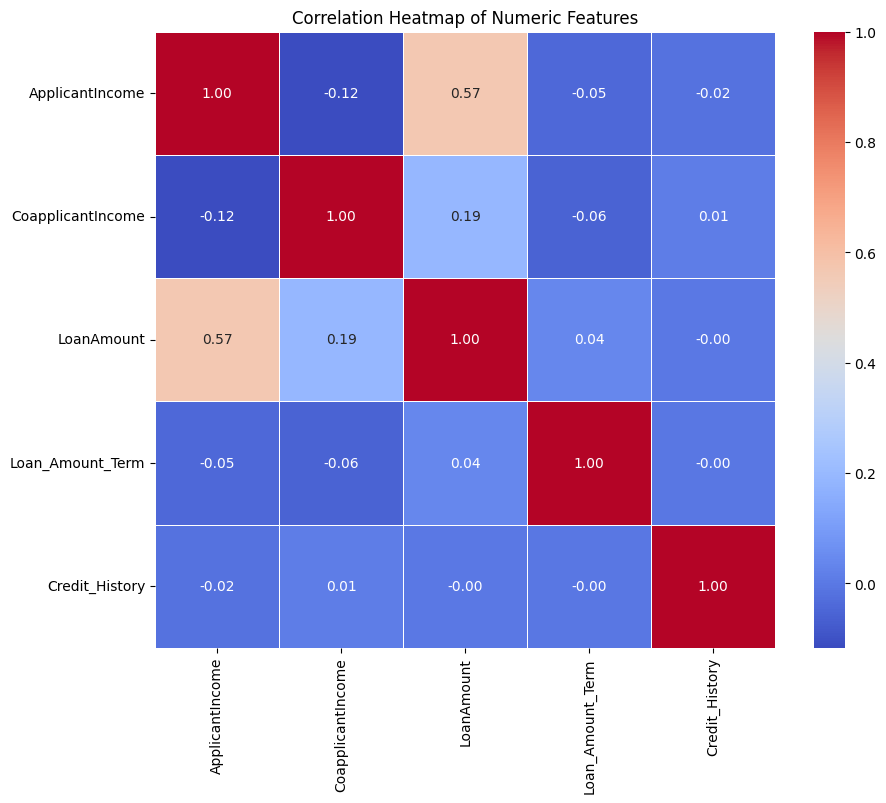

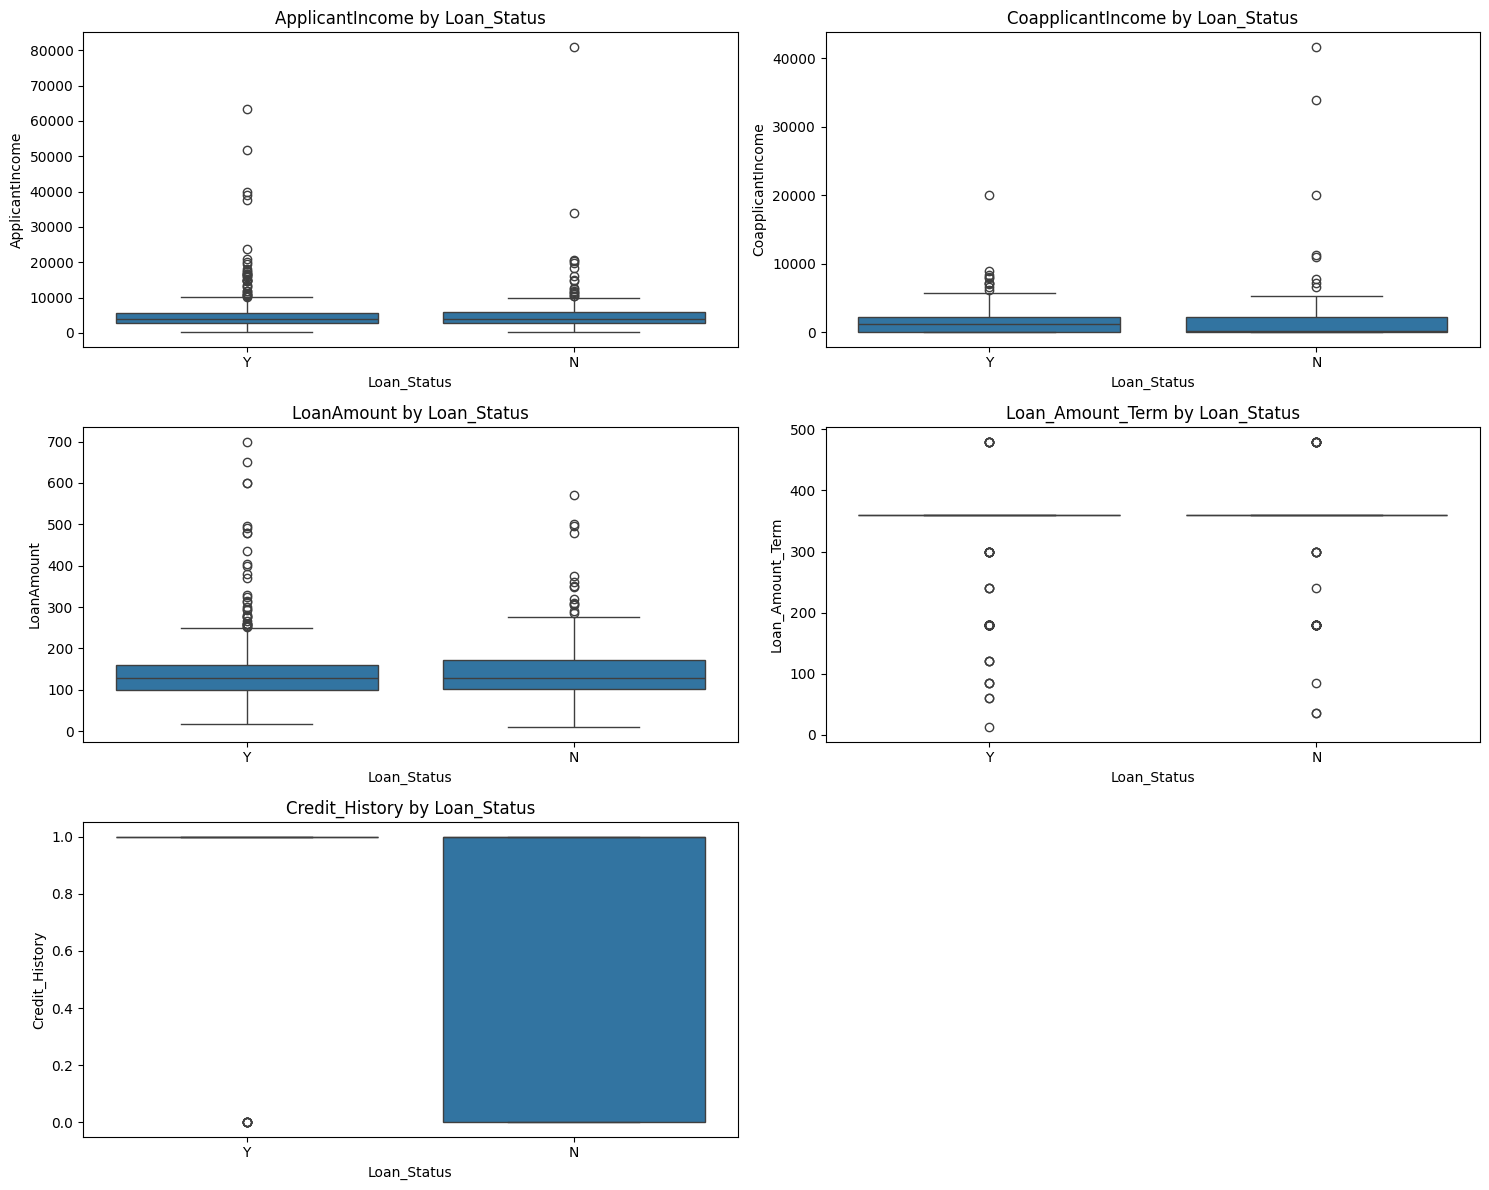

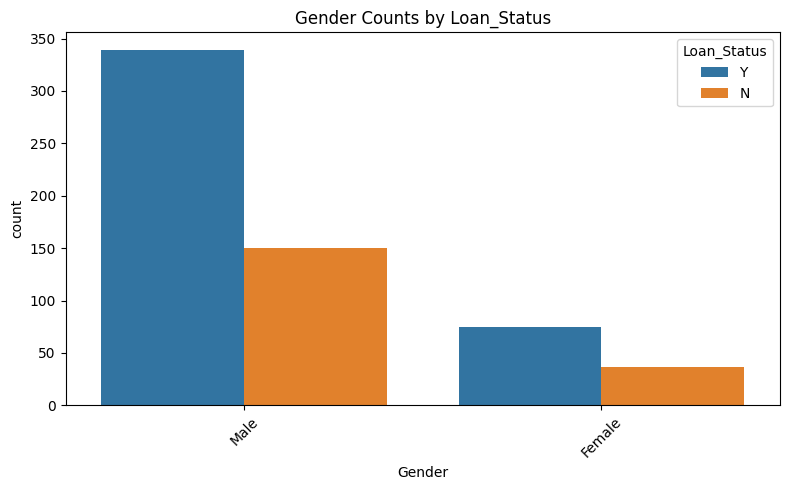

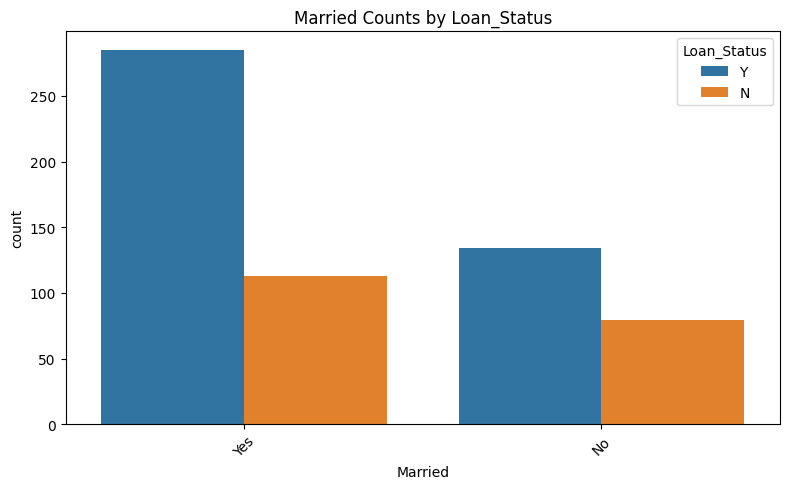

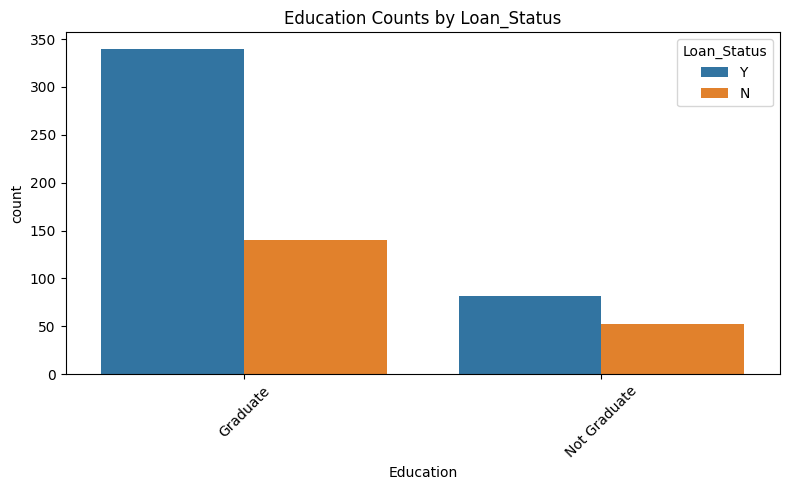

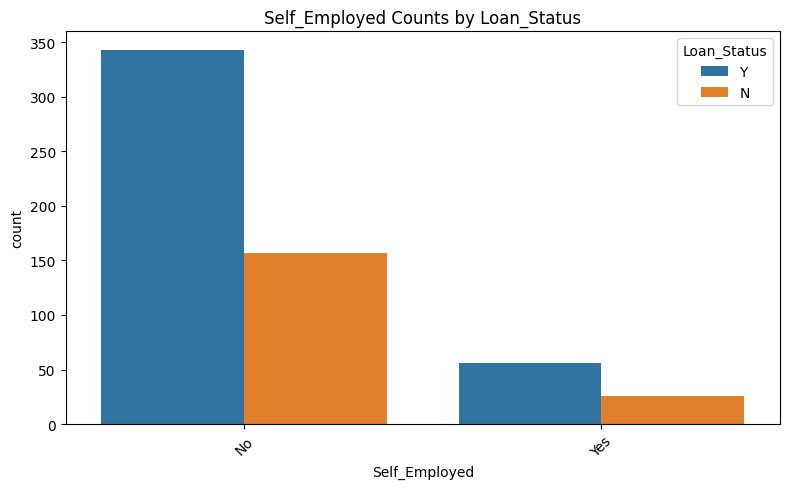

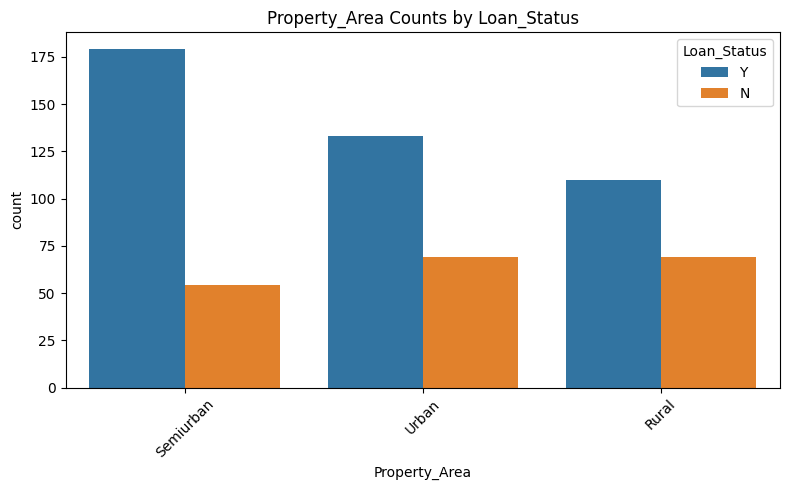


Loan Approval Rate by Gender:
Gender
Male      0.693252
Female    0.669643
Name: Loan_Status, dtype: float64

Loan Approval Rate by Married:
Married
Yes    0.716080
No     0.629108
Name: Loan_Status, dtype: float64

Loan Approval Rate by Education:
Education
Graduate        0.708333
Not Graduate    0.611940
Name: Loan_Status, dtype: float64

Loan Approval Rate by Self_Employed:
Self_Employed
No     0.686000
Yes    0.682927
Name: Loan_Status, dtype: float64

Loan Approval Rate by Property_Area:
Property_Area
Semiurban    0.768240
Urban        0.658416
Rural        0.614525
Name: Loan_Status, dtype: float64


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = r"\archive\loan_data_set.csv"
df = pd.read_csv(csv_file_path)

print("Missing values per column:\n", df.isnull().sum())

print("\nDataset Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]))
print("\nLoan_Status Distribution:")
print(df['Loan_Status'].value_counts(normalize=True))

numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numeric_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Loan_Status', y=col, data=df)
    plt.title(f'{col} by Loan_Status')
plt.tight_layout()
plt.show()

categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Loan_Status', data=df, order=df[col].value_counts().index)
    plt.title(f'{col} Counts by Loan_Status')
    plt.xticks(rotation=45)
    plt.legend(title='Loan_Status')
    plt.tight_layout()
    plt.show()
for col in categorical_cols:
    approval_rate = df.groupby(col)['Loan_Status'].apply(lambda x: (x == 'Y').mean()).sort_values(ascending=False)
    print(f"\nLoan Approval Rate by {col}:")
    print(approval_rate)
